In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("sales_data_sample.csv" , encoding = "latin")

In [3]:
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [4]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [5]:
df = df.drop(columns = ['CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'TERRITORY', 'POSTALCODE', 'STATE', 'CITY', 'ADDRESSLINE2', 'ADDRESSLINE1', 'PHONE','CUSTOMERNAME','STATUS','ORDERNUMBER','ORDERDATE'], axis = 1)

In [6]:
df

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,3,7,2003,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,3,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,4,10,2003,Motorcycles,95,S10_1678,USA,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,4,12,2004,Ships,54,S72_3212,Spain,Small
2819,29,100.00,1,3978.51,1,1,2005,Ships,54,S72_3212,Finland,Medium
2820,43,100.00,4,5417.57,1,3,2005,Ships,54,S72_3212,Spain,Medium
2821,34,62.24,1,2116.16,1,3,2005,Ships,54,S72_3212,France,Small


In [16]:
df.dtypes

QUANTITYORDERED      int64
PRICEEACH          float64
ORDERLINENUMBER      int64
SALES              float64
QTR_ID               int64
MONTH_ID             int64
YEAR_ID              int64
MSRP                 int64
PRODUCTCODE           int8
dtype: object

In [8]:
df['PRODUCTCODE'] = pd.Categorical(df['PRODUCTCODE']).codes

In [17]:
df = df.drop("PRODUCTCODE", axis = 1)

In [11]:
produntLine = pd.get_dummies(df['PRODUCTLINE'])
dealsize = pd.get_dummies(df['DEALSIZE'])

In [15]:
df = df.drop(columns = ['PRODUCTLINE', 'DEALSIZE'])

In [18]:
df = pd.concat([df,produntLine,dealsize], axis = 1)

In [19]:
df

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,1,2,2003,95,False,True,False,False,False,False,False,False,False,True
1,34,81.35,5,2765.90,2,5,2003,95,False,True,False,False,False,False,False,False,False,True
2,41,94.74,2,3884.34,3,7,2003,95,False,True,False,False,False,False,False,False,True,False
3,45,83.26,6,3746.70,3,8,2003,95,False,True,False,False,False,False,False,False,True,False
4,49,100.00,14,5205.27,4,10,2003,95,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,4,12,2004,54,False,False,False,True,False,False,False,False,False,True
2819,29,100.00,1,3978.51,1,1,2005,54,False,False,False,True,False,False,False,False,True,False
2820,43,100.00,4,5417.57,1,3,2005,54,False,False,False,True,False,False,False,False,True,False
2821,34,62.24,1,2116.16,1,3,2005,54,False,False,False,True,False,False,False,False,False,True


In [20]:
df.dtypes

QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
MSRP                  int64
Classic Cars           bool
Motorcycles            bool
Planes                 bool
Ships                  bool
Trains                 bool
Trucks and Buses       bool
Vintage Cars           bool
Large                  bool
Medium                 bool
Small                  bool
dtype: object

In [22]:
from sklearn.cluster import KMeans

In [23]:
WCSS = []
K = range(1,10)

In [25]:
for k in K:
    model = KMeans(n_clusters = k)
    model.fit(df)
    WCSS.append(model.inertia_)

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

In [26]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'WCSS')

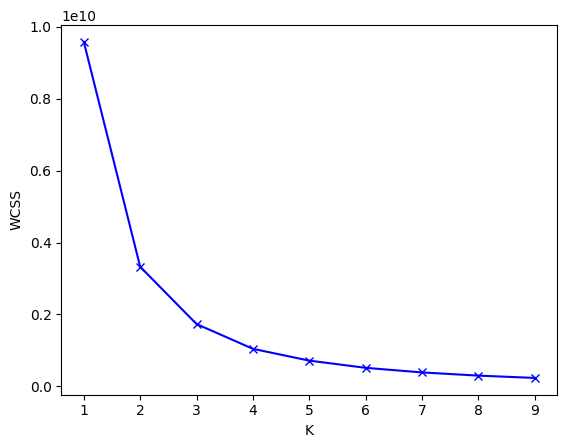

In [30]:
plt.plot(K,WCSS,'bx-')
plt.xlabel("K")
plt.ylabel("WCSS")

In [31]:
model2 = KMeans(n_clusters = 2)

In [32]:
model2.fit(df)

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [33]:
pred = model2.predict(df)

In [39]:
unique, count = np.unique(pred, return_counts = True)
count = count.reshape(1, 2)

In [40]:
newdf = pd.DataFrame(count, columns= ["Cluster1", "Cluster2"])

In [41]:
newdf

,Cluster1,Cluster2
0,796,2027
